In [72]:
from jikanpy import Jikan
import json
import time
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Jikan with the v4 base URL
jikan = Jikan(selected_base='https://api.jikan.moe/v4')

In [5]:
jikan = Jikan()

# Placeholder for the extracted data
extracted_data = []

# Define the year ranges you want to fetch data for
year_ranges = [(1917,1989), (1990, 1995), (1996, 2000), (2001, 2005), (2006, 2010), (2011, 2015), (2016, 2020), (2021, 2024)]

# Function to fetch and process anime data within a given year range
def fetch_anime_data(start_year, end_year):
    page = 1
    while True:
        try:
            # Fetch data from the API
            response = jikan.search('anime', '', page=page, parameters={
                'start_date': f'{start_year}-01-01',
                'end_date': f'{end_year}-12-31',
                'type': 'tv',
            })
            
            # Process each anime in the current page's response
            for anime in response['data']:
                mal_id = anime.get('mal_id')
                score = anime.get('score')
                rank = anime.get('rank')
                popularity = anime.get('popularity')
                season = anime.get('season')
                year = anime.get('year')
                
                # Extracting titles
                title_default = None
                title_japanese = None

                for title_entry in anime.get('titles', []):
                    if title_entry['type'] == 'Default':
                        title_default = title_entry['title']
                    elif title_entry['type'] == 'Japanese':
                        title_japanese = title_entry['title']

                # Extract all genre names as a comma-separated string
                genres = ', '.join([genre['name'] for genre in anime.get('genres', [])])
                
                # Extract all demographic names as a comma-separated string
                demographics = ', '.join([demographic['name'] for demographic in anime.get('demographics', [])])
                
                # Append the extracted information as a tuple to the list
                extracted_data.append((mal_id, title_default, title_japanese, score, rank, popularity, season, year, demographics, genres))

            
            # Check if there's another page
            if not response['pagination']['has_next_page']:
                break
            
            # Move to the next page
            page += 1
            
            # Respect the rate limit
            time.sleep(1.2)  # Slightly more than 1 second to ensure we're under the limit
            
        except Exception as e:
            print(f"An error occurred: {e}")
            break

In [6]:
# Fetch data for each defined year range
for start_year, end_year in year_ranges:
    print(f"Fetching data from {start_year} to {end_year}...")
    fetch_anime_data(start_year, end_year)

# Convert the list of tuples to a pandas DataFrame
df = pd.DataFrame(extracted_data, columns=[
    'mal_id', 'title_default', 'title_japanese', 'score', 'rank', 'popularity', 'season', 'year','demographics', 'genres'
])

Fetching data from 1917 to 1989...
Fetching data from 1990 to 1995...
Fetching data from 1996 to 2000...
Fetching data from 2001 to 2005...
Fetching data from 2006 to 2010...
Fetching data from 2011 to 2015...
Fetching data from 2016 to 2020...
Fetching data from 2021 to 2024...


In [7]:
df

,mal_id,title_default,title_japanese,score,rank,popularity,season,year,demographics,genres
0,80,Kidou Senshi Gundam,機動戦士ガンダム,7.75,1108.0,1691,spring,1979.0,,"Action, Drama, Sci-Fi"
1,85,Kidou Senshi Zeta Gundam,機動戦士Ζガンダム,7.89,812.0,2506,spring,1985.0,,"Action, Drama, Romance, Sci-Fi"
2,86,Kidou Senshi Gundam ZZ,機動戦士ガンダムZZ,6.65,5964.0,3382,spring,1986.0,,"Action, Comedy, Drama, Sci-Fi"
3,223,Dragon Ball,ドラゴンボール,7.97,677.0,149,winter,1986.0,Shounen,"Action, Adventure, Comedy, Fantasy"
4,283,Akage no Anne,赤毛のアン,7.79,1021.0,3881,winter,1979.0,,Drama
...,...,...,...,...,...,...,...,...,...,...
5420,59147,Tobot V: Ujusuhodae,또봇V 우주수호대,NaN,14301.0,26969,spring,2021.0,Kids,"Action, Sci-Fi"
5421,59583,Shasha and Milo Part 2,샤샤&마일로 NEW에피소드,NaN,13482.0,26989,spring,2024.0,Kids,"Action, Adventure, Comedy"
5422,59586,Jyulagi Cops 3rd Season,쥬라기 캅스3,NaN,15843.0,27093,fall,2021.0,Kids,Action
5423,59649,Nanashi Kaidan 3rd Season,ななし怪談 第3作,NaN,17265.0,21212,summer,2024.0,,"Horror, Supernatural"


In [50]:
df = df.drop_duplicates(subset=['mal_id'], keep='first')

In [51]:
# Save your DataFrame to the file
df.to_excel('raw_data.xlsx',index=False, engine='openpyxl')
df.to_csv( 'raw_data.csv',index=False, encoding='utf-8-sig')


In [52]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 5424 entries, 0 to 5423
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mal_id          5424 non-null   int64  
 1   title_default   5424 non-null   object 
 2   title_japanese  5419 non-null   object 
 3   score           4431 non-null   float64
 4   rank            5416 non-null   float64
 5   popularity      5424 non-null   int64  
 6   season          5310 non-null   object 
 7   year            5310 non-null   float64
 8   demographics    5424 non-null   object 
 9   genres          5424 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 466.1+ KB
None
             mal_id        score          rank    popularity         year
count   5424.000000  4431.000000   5416.000000   5424.000000  5310.000000
mean   24108.510324     6.830248   7525.762925   7760.605642  2008.856685
std    18766.867921     0.812593   5628.649206   7083.717155    13.

In [53]:
missing_data_report = df.isnull().sum()
print(missing_data_report)

mal_id              0
title_default       0
title_japanese      5
score             993
rank                8
popularity          0
season            114
year              114
demographics        0
genres              0
dtype: int64


In [54]:
df_with_score = df[df['score'].notna()]
df_with_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4431 entries, 0 to 5418
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mal_id          4431 non-null   int64  
 1   title_default   4431 non-null   object 
 2   title_japanese  4428 non-null   object 
 3   score           4431 non-null   float64
 4   rank            4423 non-null   float64
 5   popularity      4431 non-null   int64  
 6   season          4422 non-null   object 
 7   year            4422 non-null   float64
 8   demographics    4431 non-null   object 
 9   genres          4431 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 380.8+ KB


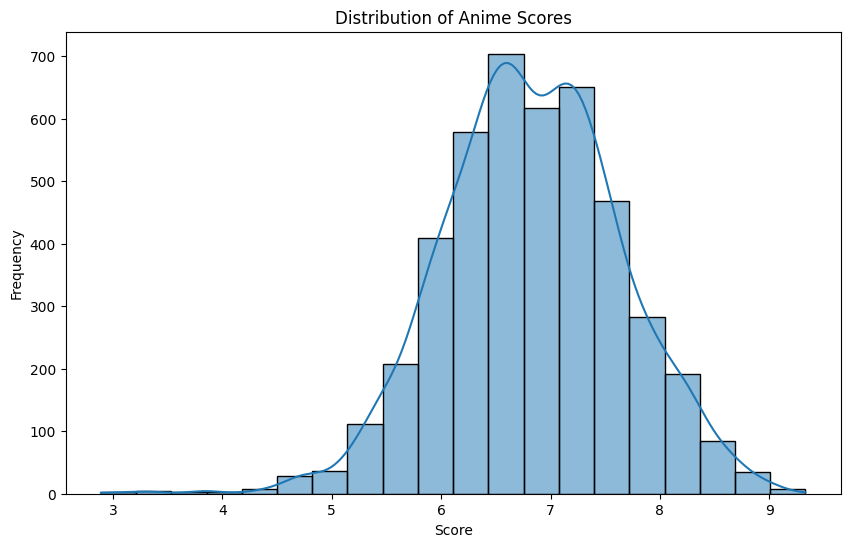

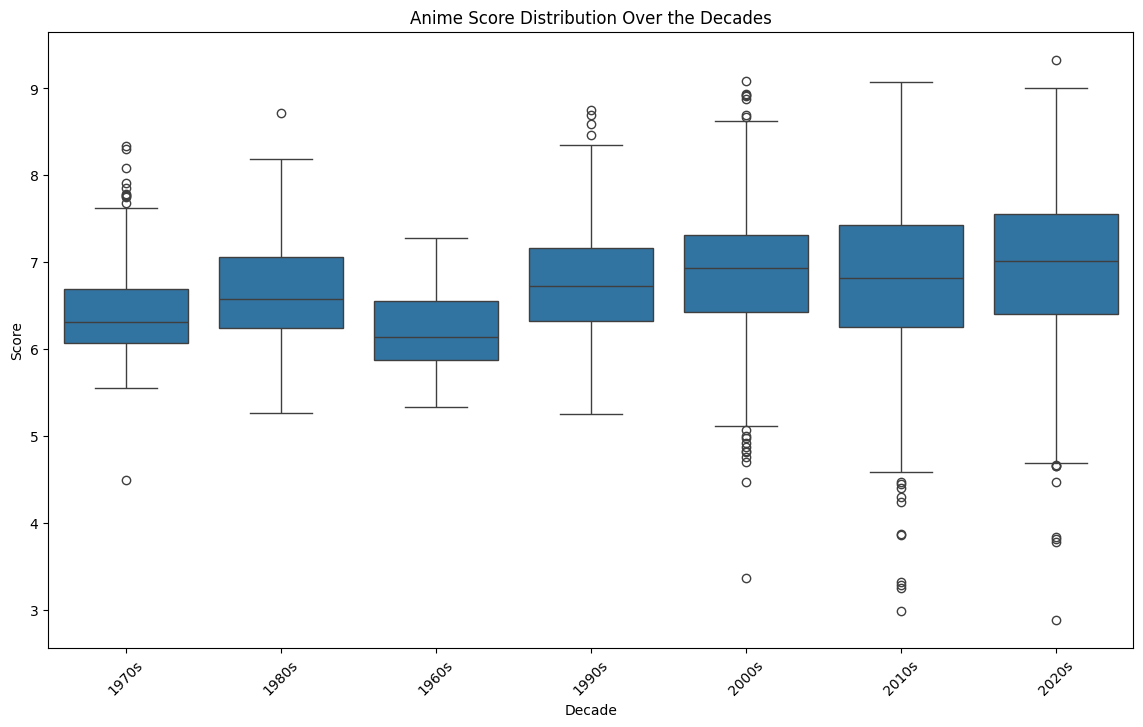

In [55]:


# Plotting the histogram of scores
plt.figure(figsize=(10, 6))
sns.histplot(df_with_score['score'], bins=20, kde=True)
plt.title('Distribution of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Filter out anime without year
df_with_score_year = df_with_score[df_with_score['year'].notna()]

df_with_score_year = df_with_score_year.copy()

# Convert year to decade
df_with_score_year['decade'] = ((df_with_score_year['year'] // 10) * 10).astype(int)

df_with_score_year['dec_label'] = df_with_score_year['decade'].astype(str) + 's'

# Plotting the score distribution over the years using a box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='dec_label', y='score', data=df_with_score_year)
plt.title('Anime Score Distribution Over the Decades')
plt.xlabel('Decade')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

### Analysis of the Distribution of Anime Scores

#### 1. **Score Distribution Histogram (First Graph):**
   - **Normal Distribution:** The histogram of anime scores appears to follow a roughly normal distribution, with the majority of scores centered around 6 to 8. This suggests that most animes tend to receive moderate to good ratings.
   - **Peak Scores:** The most frequent scores fall between 6.5 and 7.5, indicating that the average anime tends to receive a decent score, neither too high nor too low.
   - **Long Tail:** There is a noticeable tail towards both lower and higher scores. This indicates the presence of both underperforming animes (scores below 6) and highly rated animes (scores above 8), but these are less common compared to those that score in the middle range.

#### 2. **Anime Score Distribution Over the Decades (Second Graph):**
   - **1970s to 1980s:**
     - **Score Stability:** The median scores in these decades are relatively consistent, hovering around 6 to 7.
     - **Lower Range of Scores:** The spread of scores in these decades is tighter, with fewer low-scoring animes. This could indicate that early anime productions were more consistent in quality.
   - **1990s:**
     - **Wider Distribution:** The scores start to show more variability, with a broader range from about 5 to 8.5. This suggests increasing diversity in anime quality during this period, with some productions starting to stand out more.
     - **Higher Upper Quartile:** The top 25% of animes from this decade scored noticeably higher, which might reflect the rise of iconic and influential animes during this period.
   - **2000s to 2020s:**
     - **Increased Variability:** The score distribution continues to widen, especially in the lower scores. This could indicate a greater variety of anime content, including niche genres or lower-budget productions that don't always score well.
     - **Higher Median Scores in Recent Decades:** Despite the variability, the median scores in the 2000s and 2010s are higher than in previous decades. This could suggest an improvement in overall anime quality or a change in audience expectations and scoring behavior.
     - **More Outliers:** The recent decades show more outliers, particularly in the lower end, indicating a few very low-scoring animes. This could be due to increased anime production, leading to more variability in quality.

### Key Insights:
   - **Improvement Over Time:** The median score has increased slightly in recent decades, indicating potential improvements in anime quality or changes in scoring criteria.
   - **Diversity in Quality:** The increased spread of scores, especially in the 2000s and 2010s, shows that while there are highly rated animes, there is also a significant number of lower-rated ones, reflecting greater diversity in production.
   - **Consistency in Early Years:** The 1970s and 1980s show less variability in scores, possibly indicating more consistent production quality or a smaller number of releases.
   - **Impact of Iconic Animes:** The 1990s show a notable increase in higher scores, possibly due to the release of several influential animes that shaped the industry.


In [76]:
# Split the genres column by commas to create a list
df_with_score_year['genres'] = df_with_score_year['genres'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# Explode the genres column
df_exploded = df_with_score_year.explode('genres')

# Replace empty strings in the 'genres' column with NaN
df_exploded['genres'] = df_exploded['genres'].replace('', np.nan)

# Replace NaN with Unknown instead
df_exploded['genres'] = df_exploded['genres'].replace(np.nan, 'Unknown')

# Check the popular genres in the dataset
popular_genres = df_exploded['genres'].value_counts()
print(popular_genres)

genres
Comedy           1801
Action           1522
Fantasy          1202
Adventure         994
Sci-Fi            908
Drama             815
Romance           771
Supernatural      446
Slice of Life     377
Mystery           319
Ecchi             312
Sports            243
Suspense          159
Horror            136
Unknown           126
Gourmet            58
Award Winning      53
Girls Love         40
Boys Love          31
Avant Garde        24
Erotica             8
Name: count, dtype: int64


In [83]:

top_genres = popular_genres.index[:10]

# Group genres and replace others with 'Other'
df_exploded['genres_grouped'] = df_exploded['genres'].apply(lambda x: x if x in top_genres else 'Other')

# Check the updated counts
print(df_exploded['genres_grouped'].value_counts())


genres_grouped
Comedy           1801
Action           1522
Fantasy          1202
Other            1190
Adventure         994
Sci-Fi            908
Drama             815
Romance           771
Supernatural      446
Slice of Life     377
Mystery           319
Name: count, dtype: int64
